# 电信用户流失分析

## 分析背景
* 由于携号转网政策的实施，大量的客户选择其他运营商，使电信用户造成了大量的流失。本文旨在探索用户流失的原因，流失的用户具有哪些特征，该如何制定相应的政策等问题。
* 数据来源与Kaggle[https://www.kaggle.com/blastchar/telco-customer-churn]

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
D:\python\anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


## 理解与清洗数据

In [2]:
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.shape

(7043, 21)

In [4]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.describe(include='O')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,1608-GMEWB,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


* 发现TotalCharges有11个空值，进行观察填补

In [7]:
data[data['TotalCharges']==' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [8]:
data.tenure.value_counts().sort_index()[:5]

0     11
1    613
2    238
3    200
4    176
Name: tenure, dtype: int64

* **发现11个空值，都是订阅时间为0的新顾客，只交了当月的月租，所以TotalCharges应填入月费金额,tenure应填为1**

In [9]:
data.loc[data['TotalCharges']==' ','TotalCharges'] = data.loc[data['TotalCharges']==' ','MonthlyCharges']
data.loc[data['TotalCharges']==' ','tenure'] = 1

* 修改数据类型

In [10]:
cols = ['Partner','Dependents','PhoneService','PaperlessBilling','Churn']

for col in cols:
    data[col]=data[col].map({'Yes':1,'No':0})

data['TotalCharges'] = data['TotalCharges'].astype(float)
data.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.592219,64.761692,2279.798992,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.491457,30.090047,2266.730170,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,18.800000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,35.500000,398.550000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,70.350000,1394.550000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,89.850000,3786.600000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,118.750000,8684.800000,1.000000


In [11]:
data['MultipleLines'] = data['MultipleLines'].map({'Yes':1,'No':0,'No phone service':0})

cols = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies']
for col in cols:
    data[col] = data[col].map({'Yes':1,'No':0,'No internet service':0})
    data[col] = pd.to_numeric(data[col],downcast='integer')
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
Partner,7043.0,0.483033,0.499748,0.00,0.00,0.00,1.00,1.00
Dependents,7043.0,0.299588,0.458110,0.00,0.00,0.00,1.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
PhoneService,7043.0,0.903166,0.295752,0.00,1.00,1.00,1.00,1.00
MultipleLines,7043.0,0.421837,0.493888,0.00,0.00,0.00,1.00,1.00
OnlineSecurity,7043.0,0.286668,0.452237,0.00,0.00,0.00,1.00,1.00
OnlineBackup,7043.0,0.344881,0.475363,0.00,0.00,0.00,1.00,1.00
DeviceProtection,7043.0,0.343888,0.475038,0.00,0.00,0.00,1.00,1.00
TechSupport,7043.0,0.290217,0.453895,0.00,0.00,0.00,1.00,1.00


* **该样本中包含26.5%流失率，16.2%的老人，48.3%的人有配偶，30%的人有子女**
* **有60%的顾客连续使用时间不及3年**
* **有超过一半的用户月租大于平均金额64元**
* **平均年度消费金额远大于按月计算的年度消费金额，可见存在额外项目的一次性费用**

## 假设

1. **流失客户主要以个人用户为主，年轻人占多数**
2. **有配偶与儿女的用户使用时间较长**
3. **高消费的顾客倾向于签订长期合同，并伴有多个额外项目**
4. **互联网服务质量导致用户的流失**
5. **月租高是导致个人用户流失的主要原因之一**

## 可视化分析

In [12]:
# 分类数据 - 
# customerID（删对后期分析没用）
# 2类 - gender,SeniorCitizen,Partner,Dependents,PaperlessBilling,Churn
# 3类 - PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract
# 4类 - PaymentMethod
# 数值数据 - tenure, MonthlyCharges,TotalCharges

### Demographic

#### Senior

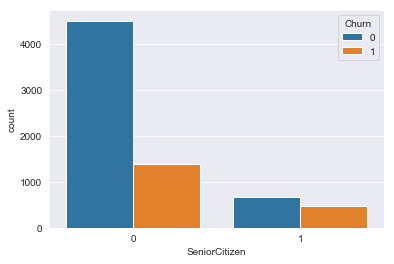

老年用户较少，流失最多的年轻人(假设1)


In [67]:
sns.countplot(data=data,x='SeniorCitizen',hue='Churn')
plt.show()
print('老年用户较少，流失最多的年轻人(假设1)')

### gender

性别与客户是否流失无显著性关系


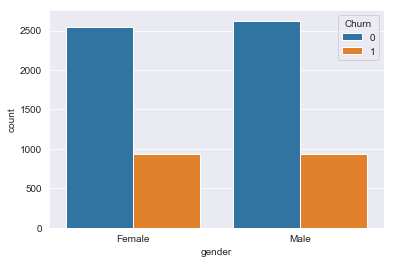

In [14]:
sns.countplot(data['gender'],hue=data['Churn'])
print('性别与客户是否流失无显著性关系')

### Dependents & Partner

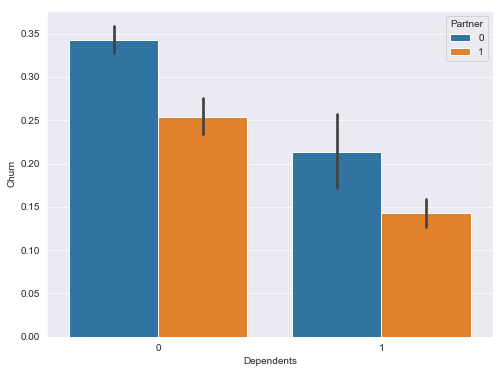

无子女和配偶的人流失率最大，流失最小的是有子女有配偶的用户
亲人是影响流失的重要因素之一


In [15]:
plt.figure(figsize=(8,6))
sns.barplot(data=data,y='Churn',x='Dependents',hue='Partner',orient='v')
plt.show()

print('无子女和配偶的人流失率最大，流失最小的是有子女有配偶的用户')
print('亲人是影响流失的重要因素之一')

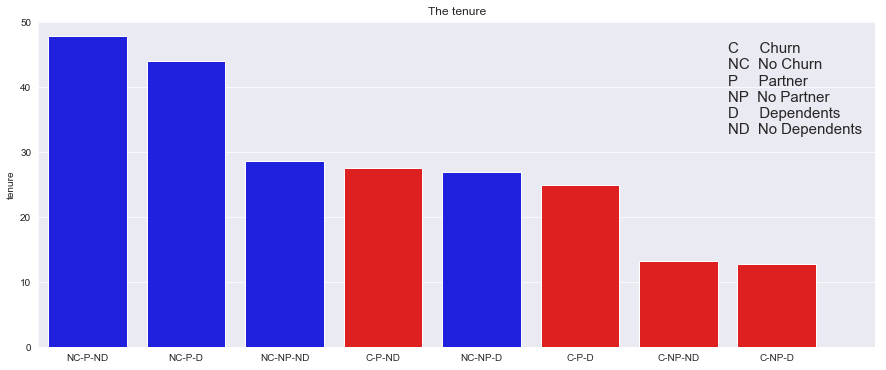

有亲人的用户比无亲人的用户持续使用时间长(假设2)
因此可推测因为用户无子女无配偶所以使用时间短导致流失,使用时间与流失是间接相关关系


In [69]:
t = data[['Partner','Dependents','Churn','tenure']].groupby(['Churn','Partner','Dependents']).mean().sort_values(by='tenure',ascending=False)
plt.figure(figsize=(15,6))
sns.barplot(data=t,y='tenure',x=t.index,palette=['blue','blue','blue','red','blue','red','red','red'])
plt.xticks(range(9),['NC-P-ND','NC-P-D','NC-NP-ND','C-P-ND','NC-NP-D','C-P-D','C-NP-ND','C-NP-D'])
plt.title('The tenure')
plt.text(x=6.5,y=47,s='C     Churn\nNC  No Churn\nP     Partner\nNP  No Partner\nD     Dependents\nND  No Dependents',verticalalignment='top',fontsize=15)
plt.show()

print('有亲人的用户比无亲人的用户持续使用时间长(假设2)')
print('因此可推测因为用户无子女无配偶所以使用时间短导致流失,使用时间与流失是间接相关关系')

# tenure & Contract

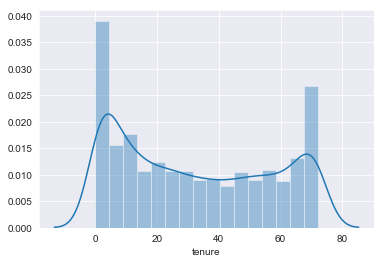

使用时间呈双峰分布,使用时间长的用户粘性较大,不易流失。


In [70]:
p = sns.FacetGrid(data=data,hue='Churn')
p.map(sns.distplot,'tenure')
print('使用时间呈双峰分布,使用时间长的用户粘性较大,不易流失。')

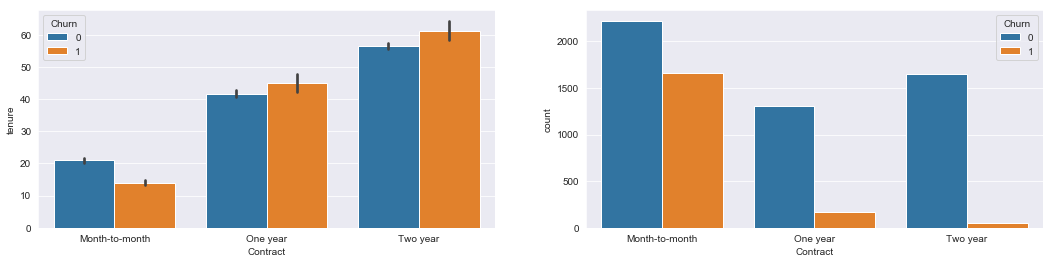

使用时间长的客户大多是签订合同时间长的客户，流失也较少，可见签订长期合同的用户有较强的用户粘性
所以流失的客户主要是按月签合同的个人用户，合同也是导致流失的主要原因之一


In [71]:
fig,axes = plt.subplots(1,2,figsize=(18,4))
sns.barplot(data=data,x='Contract',y='tenure',hue='Churn',ax=axes[0])
sns.countplot(data=data,x='Contract',hue='Churn',ax=axes[1])
plt.show()

print('使用时间长的客户大多是签订合同时间长的客户，流失也较少，可见签订长期合同的用户有较强的用户粘性')
print('所以流失的客户主要是按月签合同的个人用户，合同也是导致流失的主要原因之一')

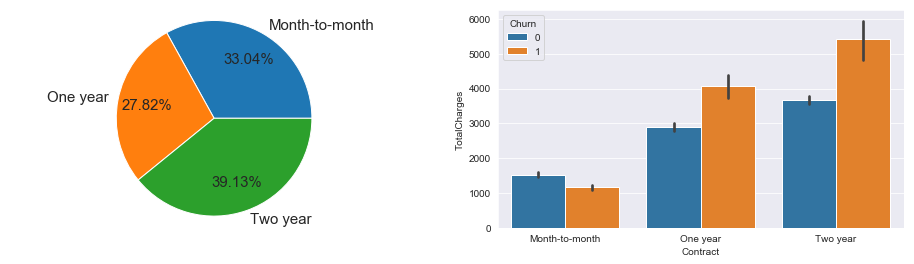

长期用户才是主要的利润来源，增加利润的方式就是使短期用户变为长期用户(假设3)


In [72]:
ct = data[['Contract','TotalCharges']].groupby('Contract').sum().reset_index()

fig,axes = plt.subplots(1,2,figsize=(16,4))
axes[0].pie(ct['TotalCharges'],labels=ct['Contract'],autopct='%.2f%%',pctdistance=0.7,textprops={'fontsize':15})
axes[0].axis('equal')
sns.barplot(data=data,x='Contract',y='TotalCharges',hue='Churn',ax=axes[1])
plt.show()

print('长期用户才是主要的利润来源，增加利润的方式就是使短期用户变为长期用户(假设3)')

In [74]:
data[data['Contract']!='Month-to-month'].describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,3168.0,0.105745,0.307559,0.00,0.00,0.000,0.000,1.00
Partner,3168.0,0.638258,0.480581,0.00,0.00,1.000,1.000,1.00
Dependents,3168.0,0.416982,0.493138,0.00,0.00,0.000,1.000,1.00
tenure,3168.0,49.904672,19.987186,0.00,35.00,55.000,68.000,72.00
PhoneService,3168.0,0.903409,0.295447,0.00,1.00,1.000,1.000,1.00
MultipleLines,3168.0,0.470013,0.499179,0.00,0.00,0.000,1.000,1.00
OnlineSecurity,3168.0,0.410038,0.491918,0.00,0.00,0.000,1.000,1.00
OnlineBackup,3168.0,0.431187,0.495320,0.00,0.00,0.000,1.000,1.00
DeviceProtection,3168.0,0.462437,0.498666,0.00,0.00,0.000,1.000,1.00
TechSupport,3168.0,0.433396,0.495622,0.00,0.00,0.000,1.000,1.00


In [77]:
print('长期顾客中几乎有一半的用户定制了全部额外附加项目，有一半以上的人选择了DSL（假设3）')

长期顾客中几乎有一半的用户定制了全部额外附加项目，有一半以上的人选择了DSL（假设3）


In [76]:
data[data['Contract']!='Month-to-month'].describe(include='O')

,customerID,gender,InternetService,Contract,PaymentMethod
count,3168,3168,3168,3168,3168
unique,3168,2,3,2,4
top,0756-MPZRL,Male,DSL,Two year,Credit card (automatic)
freq,1,1605,1198,1695,979


In [78]:
data[data['Contract']!='Month-to-month']['InternetService'].value_counts()

DSL            1198
No             1002
Fiber optic     968
Name: InternetService, dtype: int64

In [80]:
print('DSL更有利于增加用户粘性，Fiber optic的服务质量有待提高(假设4)')

DSL更有利于增加用户粘性，Fiber optic的服务质量有待提高(假设4)


## Phone Service

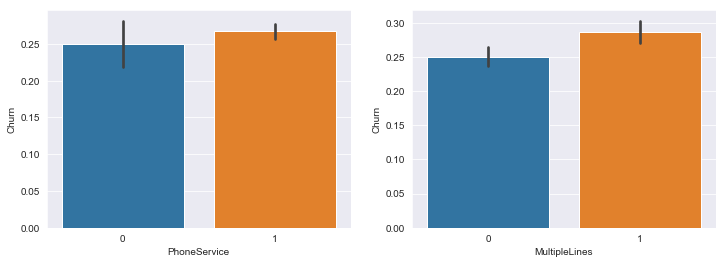

电话服务对用户流失的影响不大


In [20]:
cols = ['PhoneService','MultipleLines']
fig,axes = plt.subplots(1,2,figsize=(12,4))
for col,i in zip(cols,range(2)):
    sns.barplot(data=data,x=col,y='Churn',orient='v',ax=axes[i])
plt.show()

print('电话服务对用户流失的影响不大')

## Internet Service

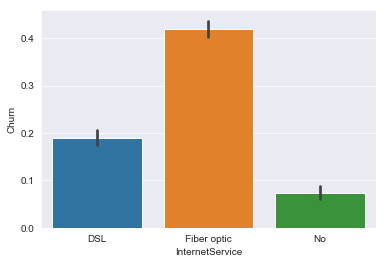

拥有互联网服务的用户流失较大，特别是选择Fiber optic的用户（假设4）


In [81]:
sns.barplot(data=data,x='InternetService',y='Churn')
plt.show()

print('拥有互联网服务的用户流失较大，特别是选择Fiber optic的用户（假设4）')

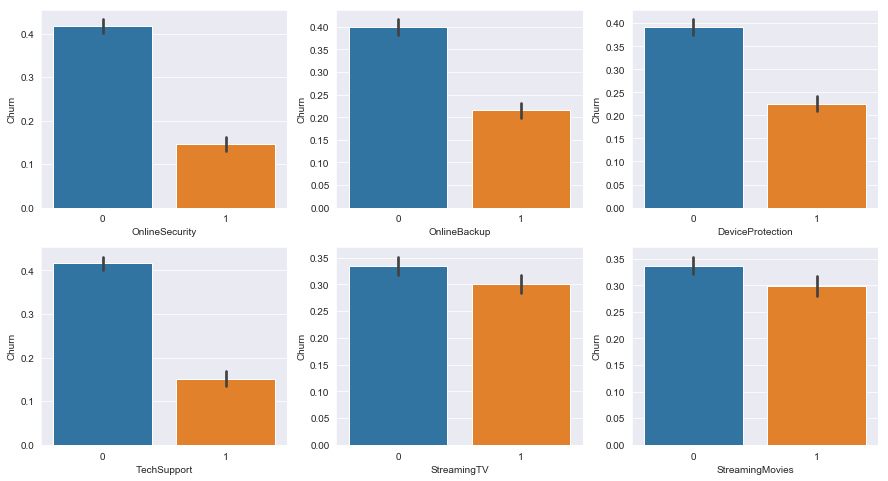

除了流媒体业务外，其余所有项目均表现出没有与有之间的显著性差异
需要针对不同的客户制定不同的额外项目服务
Fiber optic在除流媒体外其他项目上的表现都不尽如人意


In [82]:
internet = data[['InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn']]
internet = internet[internet['InternetService']!='No']
postion = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2)]
fig,axes = plt.subplots(2,3,figsize=(15,8))

for i,z in zip(internet.columns.tolist()[1:-1],postion):    
    sns.barplot(data=internet,y='Churn',x=i,ax=axes[z])
plt.show()

print('除了流媒体业务外，其余所有项目均表现出没有与有之间的显著性差异')
print('需要针对不同的客户制定不同的额外项目服务')
print('Fiber optic在除流媒体外其他项目上的表现都不尽如人意')

## Payment Method

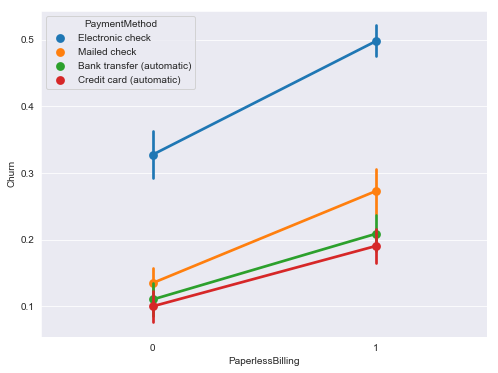

使用电子账单的用户流失率显著大于其余三者


In [83]:
plt.figure(figsize=(8,6))
sns.pointplot(data=data,y='Churn',x='PaperlessBilling',hue='PaymentMethod')
plt.show()
print('使用电子账单的用户流失率显著大于其余三者')

## Charges

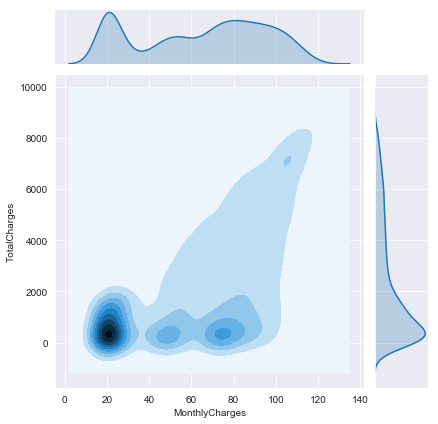

大量用户的年消费持续在最低处，月消费在20，50和80三个点上有大量用户


In [84]:
sns.jointplot(kind='kde',data=data,x='MonthlyCharges',y='TotalCharges')
plt.show()
print('大量用户的年消费持续在最低处，月消费在20，50和80三个点上有大量用户')

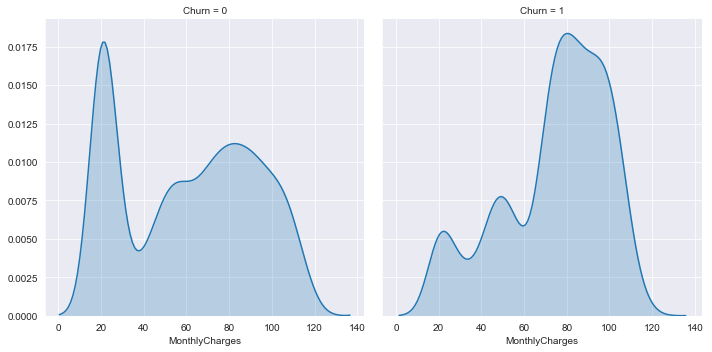

流失用户的月费较多处于80-100之间，留存用户则集中在20和80元两个点周围。
推测这些80元左右的人有可能成为下一批流失用户。


In [89]:
g = sns.FacetGrid(data=data,col='Churn',height=5)
g.map(sns.kdeplot,'MonthlyCharges',shade=True)
plt.show()
print('流失用户的月费较多处于80-100之间，留存用户则集中在20和80元两个点周围。')
print('推测这些80元左右的人有可能成为下一批流失用户。')

In [61]:
c_m = data[(data['Churn']==1)&(data['MonthlyCharges']>=60)]
c_m.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,1380.0,0.292754,0.455191,0.0,0.0000,0.000,1.0000,1.00
Partner,1380.0,0.389855,0.487894,0.0,0.0000,0.000,1.0000,1.00
Dependents,1380.0,0.165942,0.372163,0.0,0.0000,0.000,0.0000,1.00
tenure,1380.0,20.639855,20.246415,1.0,4.0000,13.000,34.0000,72.00
PhoneService,1380.0,0.999275,0.026919,0.0,1.0000,1.000,1.0000,1.00
MultipleLines,1380.0,0.585507,0.492813,0.0,0.0000,1.000,1.0000,1.00
OnlineSecurity,1380.0,0.163043,0.369539,0.0,0.0000,0.000,0.0000,1.00
OnlineBackup,1380.0,0.319565,0.466477,0.0,0.0000,0.000,1.0000,1.00
DeviceProtection,1380.0,0.340580,0.474076,0.0,0.0000,0.000,1.0000,1.00
TechSupport,1380.0,0.180435,0.384689,0.0,0.0000,0.000,0.0000,1.00


In [62]:
c_m.describe(include='O')

,customerID,gender,InternetService,Contract,PaymentMethod
count,1380,1380,1380,1380,1380
unique,1380,2,2,3,4
top,7683-CBDKJ,Female,Fiber optic,Month-to-month,Electronic check
freq,1,713,1297,1205,872


In [91]:
print('这些流失人群中有50%左右是无配偶与子女，使用时间不及一年，办理了多线和流媒体服务的用户')
print('推测：\n1.这部分人因为多线的冗余选择了离开\n2.这部分人对流媒体不满意选择了离开\n3.这部分人认为月租太贵选择了离开\n4.因为Fiber optic导致的流失')

这些流失人群中有50%左右是无配偶与子女，使用时间不及一年，办理了多线和流媒体服务的用户
推测：
1.这部分人因为多线的冗余选择了离开
2.这部分人对流媒体不满意选择了离开
3.这部分人认为月租太贵选择了离开
4.因为Fiber optic导致的流失


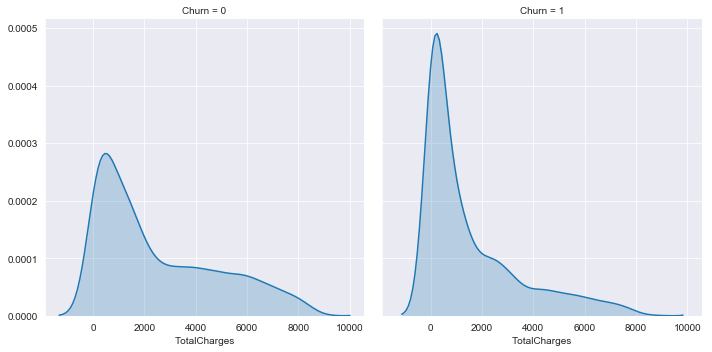

流失用户的年费集中在500元以下


In [54]:
g = sns.FacetGrid(data=data,col='Churn',height=5)
g.map(sns.kdeplot,'TotalCharges',shade=True)
plt.show()
print('流失用户的年费集中在500元以下')

In [56]:
c_t = data[(data['Churn']==1)&(data['TotalCharges']<=500)]
c_t.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,829.0,0.193004,0.394894,0.00,0.00,0.00,0.00,1.0
Partner,829.0,0.217129,0.412540,0.00,0.00,0.00,0.00,1.0
Dependents,829.0,0.155609,0.362703,0.00,0.00,0.00,0.00,1.0
tenure,829.0,2.846803,2.786602,1.00,1.00,2.00,4.00,20.0
PhoneService,829.0,0.872135,0.334141,0.00,1.00,1.00,1.00,1.0
MultipleLines,829.0,0.235223,0.424394,0.00,0.00,0.00,0.00,1.0
OnlineSecurity,829.0,0.071170,0.257264,0.00,0.00,0.00,0.00,1.0
OnlineBackup,829.0,0.132690,0.339444,0.00,0.00,0.00,0.00,1.0
DeviceProtection,829.0,0.138721,0.345864,0.00,0.00,0.00,0.00,1.0
TechSupport,829.0,0.086852,0.281788,0.00,0.00,0.00,0.00,1.0


In [57]:
c_t.describe(include='O')

,customerID,gender,InternetService,Contract,PaymentMethod
count,829,829,829,829,829
unique,829,2,3,2,4
top,9526-BIHHD,Female,Fiber optic,Month-to-month,Electronic check
freq,1,425,443,819,476


In [60]:
print('年费高的流失用户中拥有互联网服务的较少，多为没有子女与配偶的用户，Fiber optic用户居多，几乎全部都是月租用户')
print('推测：用户因为fiber optic的服务问题并且收取相关年费价格过高而流失')

年费高的流失用户中拥有互联网服务的较少，多为没有子女的用户，Fiber optic用户居多，几乎全部都是月租用户
推测：用户因为fiber optic的服务问题并且收取相关年费价格过高而流失


1. 老年人与年轻人的月租差异
2. 主要的数量化特征和类别变量之间的关系
3. pd.factorize()

# Model

In [198]:
m_data = data[['SeniorCitizen','Partner', 'Dependents','tenure','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaymentMethod','MonthlyCharges', 'TotalCharges', 'Churn']]
m_data.head()

,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,DSL,0,1,0,0,Month-to-month,Electronic check,29.85,29.85,0
1,0,0,0,34,DSL,1,0,1,0,One year,Mailed check,56.95,1889.50,0
2,0,0,0,2,DSL,1,1,0,0,Month-to-month,Mailed check,53.85,108.15,1
3,0,0,0,45,DSL,1,0,1,1,One year,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,2,Fiber optic,0,0,0,0,Month-to-month,Electronic check,70.70,151.65,1


In [199]:
m_data['Relationship'] = 0
m_data.loc[(m_data['Partner']==1) | (m_data['Dependents']==1),'Relationship'] = 1
del m_data['Partner']
del m_data['Dependents']
m_data['Relationship'].value_counts()

1    3763
0    3280
Name: Relationship, dtype: int64

In [200]:
from sklearn.preprocessing import OneHotEncoder

x = m_data.loc[:,'InternetService'].values.reshape(-1,1)
enc = OneHotEncoder().fit(x)
result = enc.transform(x).toarray()
result = pd.DataFrame(result)
m_data = pd.concat([m_data,result],axis=1)
m_data.head()

,SeniorCitizen,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Relationship,0,1,2
0,0,1,DSL,0,1,0,0,Month-to-month,Electronic check,29.85,29.85,0,1,1.0,0.0,0.0
1,0,34,DSL,1,0,1,0,One year,Mailed check,56.95,1889.50,0,0,1.0,0.0,0.0
2,0,2,DSL,1,1,0,0,Month-to-month,Mailed check,53.85,108.15,1,0,1.0,0.0,0.0
3,0,45,DSL,1,0,1,1,One year,Bank transfer (automatic),42.30,1840.75,0,0,1.0,0.0,0.0
4,0,2,Fiber optic,0,0,0,0,Month-to-month,Electronic check,70.70,151.65,1,0,0.0,1.0,0.0


In [201]:
for i in range(3):
    m_data[i] = pd.to_numeric(m_data[i],downcast='integer')
m_data.rename(columns={0:'DSL',1:'Fiber optic',2:'NoInternetService'},inplace=True)
del m_data['InternetService']
m_data.head()

,SeniorCitizen,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Relationship,DSL,Fiber optic,NoInternetService
0,0,1,0,1,0,0,Month-to-month,Electronic check,29.85,29.85,0,1,1,0,0
1,0,34,1,0,1,0,One year,Mailed check,56.95,1889.50,0,0,1,0,0
2,0,2,1,1,0,0,Month-to-month,Mailed check,53.85,108.15,1,0,1,0,0
3,0,45,1,0,1,1,One year,Bank transfer (automatic),42.30,1840.75,0,0,1,0,0
4,0,2,0,0,0,0,Month-to-month,Electronic check,70.70,151.65,1,0,0,1,0


In [202]:
m_data['Contract'] = m_data['Contract'].map({'Month-to-month':0,'One year':1,'Two year':1})
m_data['PaymentMethod'] = m_data['PaymentMethod'].map({'Electronic check':0, 'Mailed check':1, 'Bank transfer (automatic)':1,'Credit card (automatic)':1})
m_data.head()

,SeniorCitizen,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Relationship,DSL,Fiber optic,NoInternetService
0,0,1,0,1,0,0,0,0,29.85,29.85,0,1,1,0,0
1,0,34,1,0,1,0,1,1,56.95,1889.50,0,0,1,0,0
2,0,2,1,1,0,0,0,1,53.85,108.15,1,0,1,0,0
3,0,45,1,0,1,1,1,1,42.30,1840.75,0,0,1,0,0
4,0,2,0,0,0,0,0,0,70.70,151.65,1,0,0,1,0


In [203]:
m_data['tenure'] = pd.cut(m_data['tenure'],bins=5)
m_data['tenure'] = m_data['tenure'].astype(str)
m_data['tenure'] = m_data['tenure'].map({'(-0.072, 14.4]':0,'(14.4, 28.8]':1,'(28.8, 43.2]':2,'(43.2, 57.6]':3,'(57.6, 72.0]':4})

m_data['MonthlyCharges'] = pd.cut(m_data['MonthlyCharges'],bins=5)
m_data['MonthlyCharges'] = m_data['MonthlyCharges'].astype(str)
m_data['MonthlyCharges'] = m_data['MonthlyCharges'].map({'(18.15, 38.35]':0,'(38.35, 58.45]':1,'(58.45, 78.55]':2,'(78.55, 98.65]':3,'(98.65, 118.75]':4})

m_data['TotalCharges'] = pd.cut(m_data['TotalCharges'],bins=5)
m_data['TotalCharges'] = m_data['TotalCharges'].astype(str)
m_data['TotalCharges'] = m_data['TotalCharges'].map({'(10.134, 1752.0]':0,'(1752.0, 3485.2]':1,'(3485.2, 5218.4]':2,'(5218.4, 6951.6]':3,'(6951.6, 8684.8]':4})

m_data.head()

,SeniorCitizen,tenure,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,Contract,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Relationship,DSL,Fiber optic,NoInternetService
0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0
1,0,2,1,0,1,0,1,1,1,1,0,0,1,0,0
2,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0
3,0,3,1,0,1,1,1,1,1,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,2,0,1,0,0,1,0


In [211]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [212]:
xtrain,xtest,ytrain,ytest = train_test_split(m_data[['SeniorCitizen','Relationship','tenure','NoInternetService','DSL','Fiber optic','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','Contract','PaymentMethod','MonthlyCharges','TotalCharges']],m_data['Churn'],test_size=0.3)

In [221]:
params = {'max_depth':[*range(5,20)],
        'min_samples_split':[*range(2,10)],
        'min_samples_leaf':[*range(1,10)]
        }
clf = DecisionTreeClassifier(criterion='gini',splitter='random',random_state=20)
g = GridSearchCV(clf,params,cv=10)
g.fit(xtrain,ytrain)
display(g.best_params_,g.best_score_)

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

0.7912778904665314

In [231]:
params = {'n_neighbors':[*range(1,20)],
          'weights':['distance','uniform'],
          'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
          'leaf_size':[*range(30,50)]}

knn = KNeighborsClassifier()             
g = GridSearchCV(knn,params,cv=10)
g.fit(xtrain,ytrain)

display(g.best_params_,g.best_score_)

{'algorithm': 'ball_tree',
 'leaf_size': 30,
 'n_neighbors': 19,
 'weights': 'uniform'}

0.7920892494929006